## import Library

In [301]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

## import dataset

In [302]:
data = pd.read_csv('Big Sales Data.csv')

## Understanding of data

In [303]:
data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000


In [304]:
rows,columns=data.shape
print('no of rows', rows)
print('no of columns', columns)
# there are 14204 rows and 12 columns 

no of rows 14204
no of columns 12


In [305]:
print('data type of variables\n',data.dtypes)

data type of variables
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [306]:
cat_col=data.select_dtypes(object).columns
num_col=data.select_dtypes(np.number).columns
print('categorical column',cat_col)
print('numerical column',num_col)

categorical column Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
numerical column Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [308]:
# there are missing values in the column Item_weight

In [309]:
data.isnull().sum()
# here it shows that there are 2389 missing values

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [310]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11815.0,12.788355,4.654126,4.555,8.710000,12.500000,16.750000,30.000000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,14204.0,2185.836320,1827.479550,33.290,922.135101,1768.287680,2988.110400,31224.726950


In [311]:
data.describe(include=object).T

,count,unique,top,freq
Item_Identifier,14204,1559,FDT36,10
Item_Fat_Content,14204,5,Low Fat,8485
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,14204,3,Medium,7122
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294


In [312]:
data['Item_Weight'].fillna(data.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace=True)

<Axes: >

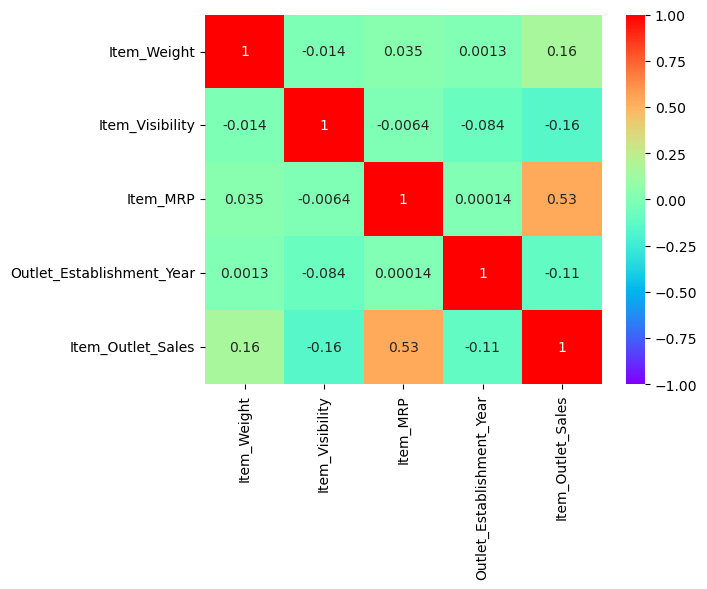

In [313]:
sns.heatmap(data[num_col].corr(),vmin=-1,vmax=1,annot=True,cmap='rainbow')

In [314]:
len(num_col)

5

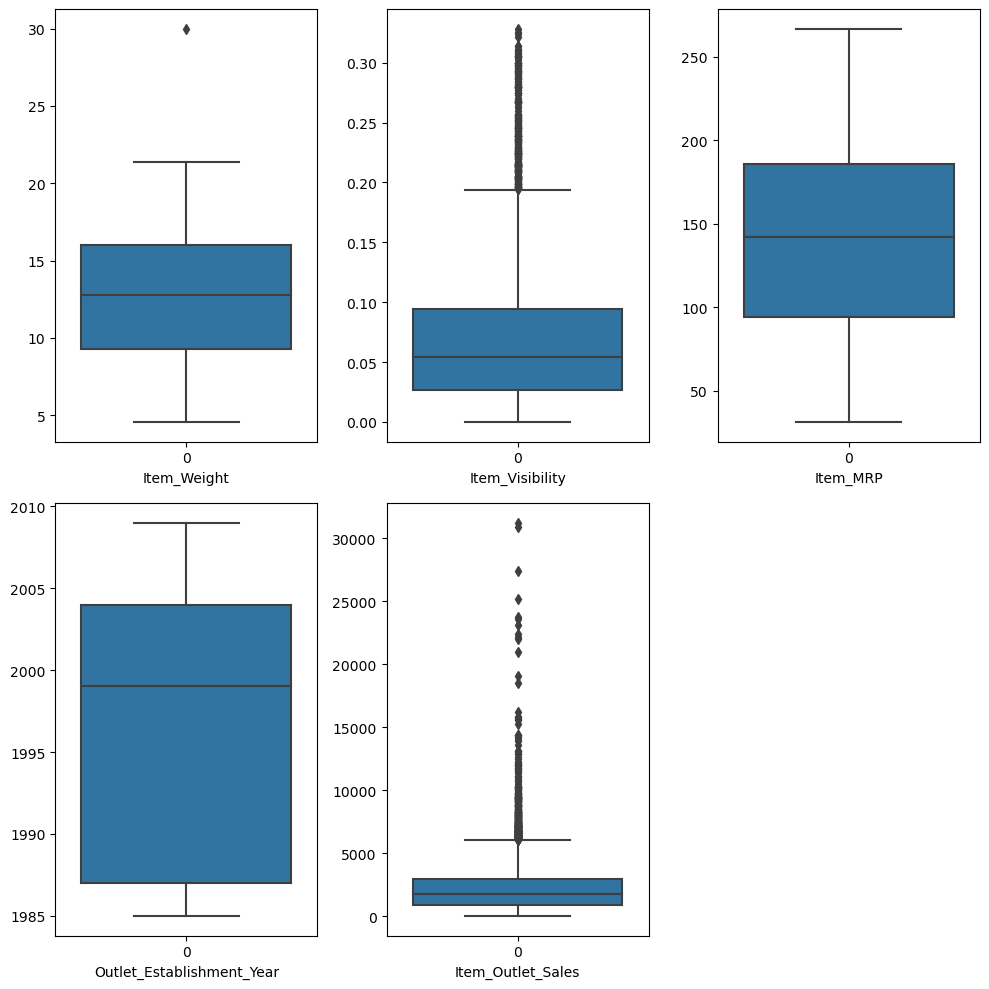

In [315]:
t=1
plt.figure(figsize=(10,10))
for i in num_col:
    plt.subplot(2,3,t)
    sns.boxplot(data[i])
    plt.xlabel(i)
    t+=1
plt.tight_layout()
plt.show()

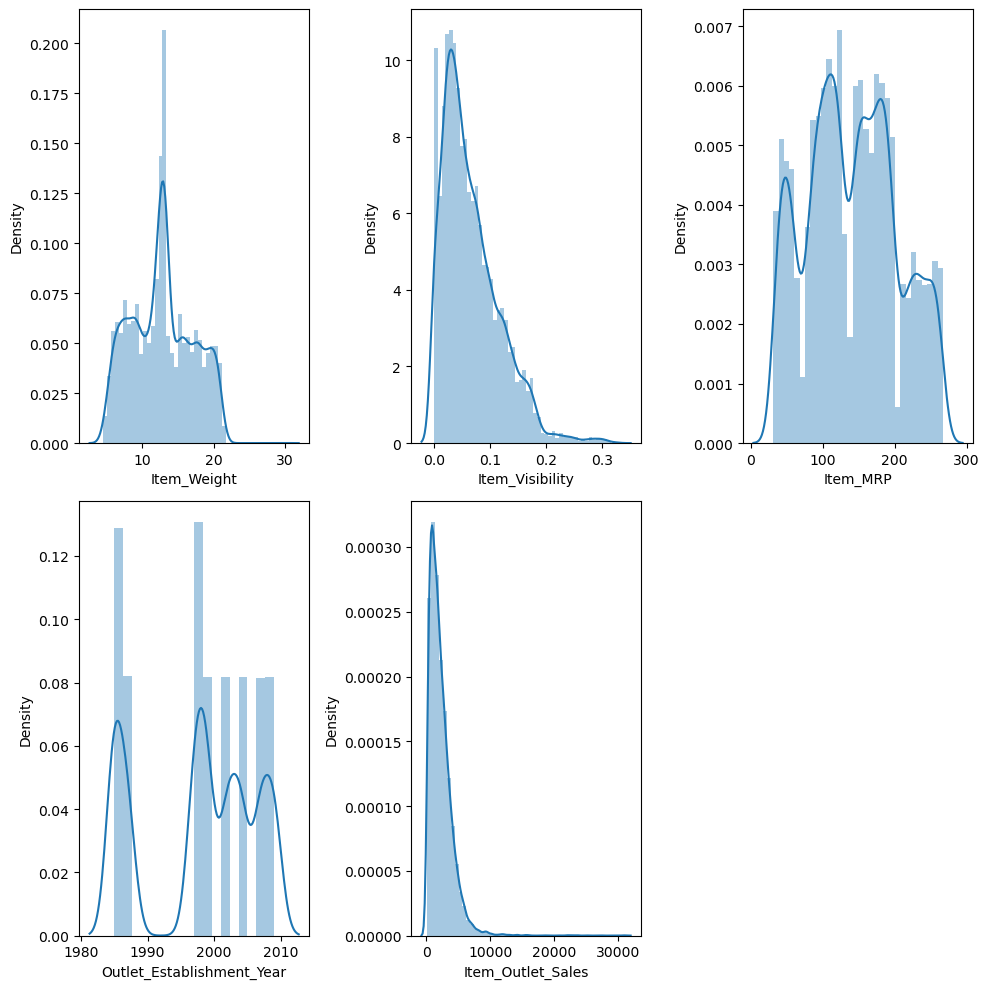

In [316]:
t=1
plt.figure(figsize=(10,10))
for i in num_col:
    plt.subplot(2,3,t)
    sns.distplot(data[i])
    plt.xlabel(i)
    t+=1
plt.tight_layout()
plt.show()

In [317]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Get categories and counts of categorical variables

In [318]:
data['Item_Identifier'].value_counts()

Item_Identifier
FDT36    10
FDG09    10
FDZ56    10
FDT19    10
FDD56    10
         ..
NCW54     7
FDS22     7
FDM50     7
FDX49     7
DRN11     7
Name: count, Length: 1559, dtype: int64

In [319]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [320]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'}},inplace=True)

In [321]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [322]:
data.replace({'Item_Fat_Content': {'Low Fat':0, 'Regular': 1}}, inplace=True)

In [323]:
data[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [324]:
data['Item_Type'].replace({'Fruits and Vegetables': 0, 'Snack Foods': 0, 'Household': 1, 'Frozen Foods': 0, 'Dairy': 0, 
                           'Baking Goods': 0, 'Canned': 0, 'Health and Hygiene': 1, 'Meat': 0, 'Soft Drinks': 0, 'Breads': 0, 'Hard Drinks': 0, 'Others': 2,
                           'Starchy Foods': 0, 'Breakfast': 0, 'Seafood': 0}, inplace=True)

In [325]:
data['Item_Type'].value_counts()

Item_Type
0    11518
1     2406
2      280
Name: count, dtype: int64

In [326]:
data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [327]:
data['Outlet_Identifier'].replace({'OUT027' : 0, 'OUT013' : 1, 'OUT049' : 2, 
                                   'OUT046' : 3, 'OUT035' : 4, 'OUT045' : 5, 
                                   'OUT018' : 6, 'OUT017' : 7, 
                                   'OUT010' : 8, 'OUT019' : 9  }, inplace=True)

In [328]:
data['Outlet_Identifier'].value_counts()

Outlet_Identifier
0    1559
1    1553
2    1550
3    1550
4    1550
5    1548
6    1546
7    1543
8     925
9     880
Name: count, dtype: int64

In [329]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [330]:
data['Outlet_Type'].replace({  'Grocery Store'  : 0,
                            'Supermarket Type1' : 1,
                             'Supermarket Type2' : 2,
                             'Supermarket Type3' : 3,
                              }, inplace= True)

In [331]:
data['Outlet_Type'].value_counts()

Outlet_Type
1    9294
0    1805
3    1559
2    1546
Name: count, dtype: int64

In [332]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    7122
Small     5529
High      1553
Name: count, dtype: int64

In [333]:
data['Outlet_Size'].replace({ 'Small'  : 0,
                              'Medium'  : 1,
                              'High'    : 2 }, inplace=True)
                             

In [334]:
data['Outlet_Location_Type'].replace({'Tier 3' : 0,
                                      'Tier 2'  : 1 ,
                                       'Tier 1' :2}, inplace=True)

In [335]:
data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
0    5583
1    4641
2    3980
Name: count, dtype: int64

In [336]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.300000,0,0.111448,0,33.4874,2,1999,1,2,1,436.608721
1,FDT36,12.300000,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.300000,0,0.111728,0,33.9874,6,2009,1,0,2,564.598400
3,FDT36,12.300000,0,0.000000,0,34.3874,9,1985,0,2,0,1719.370000
4,FDP12,9.800000,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDG47,12.800000,0,0.069606,0,261.9252,4,2004,0,1,1,4984.178800
14200,FDG47,12.800000,0,0.070013,0,262.8252,7,2007,1,1,1,2885.577200
14201,FDG47,12.800000,0,0.069561,0,263.0252,1,1987,2,0,1,2885.577200
14202,FDG47,13.659758,0,0.069282,0,263.5252,0,1985,1,0,3,3803.676434


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


## Define target(y) and independent (x) variable

In [338]:
y=data['Item_Outlet_Sales']
x=data.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])

In [339]:
y.shape

(14204,)

In [340]:
x.shape

(14204, 10)

In [341]:
from sklearn.preprocessing import StandardScaler

In [342]:
scale=StandardScaler()

In [343]:
x_std=data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [344]:
x_std=scale.fit_transform(x_std)

In [345]:
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [346]:
x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]=pd.DataFrame(x_std,columns=[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

In [347]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,2,0.139681,1,2,1
1,-0.115417,0,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-0.115417,0,0.889583,0,-1.723734,6,1.334228,1,0,2
3,-0.115417,0,-1.281712,0,-1.717291,9,-1.532686,0,2,0
4,-0.703509,1,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,0,1.947664,4,0.736955,0,1,1
14200,0.002201,0,0.078898,0,1.962160,7,1.095319,1,1,1
14201,0.002201,0,0.070120,0,1.965381,1,-1.293777,2,0,1
14202,0.204448,0,0.064694,0,1.973435,0,-1.532686,1,0,3


## get train test split 

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
xtrain, xtest, ytrain,ytest= train_test_split(x,y, test_size=0.1, random_state=345)

In [350]:
xtrain.shape, xtest.shape, ytrain.shape,ytest.shape

((12783, 10), (1421, 10), (12783,), (1421,))

# train the model 

In [351]:
from sklearn.ensemble import RandomForestRegressor

In [352]:
rf=RandomForestRegressor(random_state=3445)

In [353]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(random_state=3445)

## model prediction 

In [354]:
y_pred=rf.predict(xtest)

In [355]:
y_pred.shape

(1421,)

In [356]:
y_pred

array([2756.34396401, 3377.82125453,  464.67328855, ..., 5464.7914418 ,
       2178.10709637,  453.2821183 ])

## model evaluation

In [369]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, mean_absolute_percentage_error

In [358]:
mean_squared_error(ytest,y_pred)

1648930.0804958967

In [359]:
 mean_absolute_error(ytest,y_pred)

849.476111505159

In [360]:
r2_score(ytest,y_pred)

0.47905235742992214

In [370]:
mape = mean_absolute_percentage_error(ytest, y_pred)
mape

0.7353810230376772

## get visualization of actual Vs predicted results

In [361]:
import matplotlib.pyplot as plt

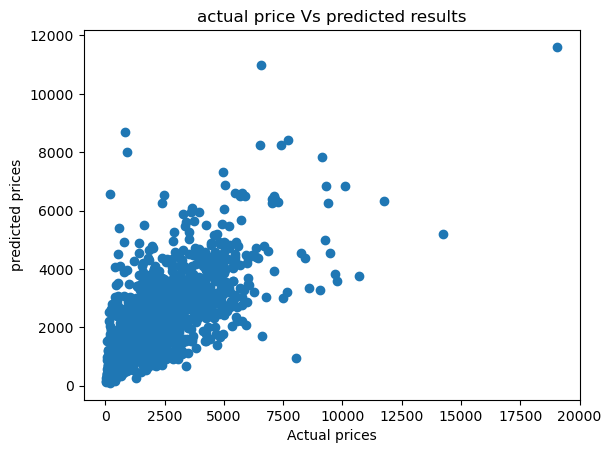

In [362]:
plt.scatter(ytest,y_pred)
plt.xlabel('Actual prices')
plt.ylabel('predicted prices')
plt.title('actual price Vs predicted results')
plt.show()

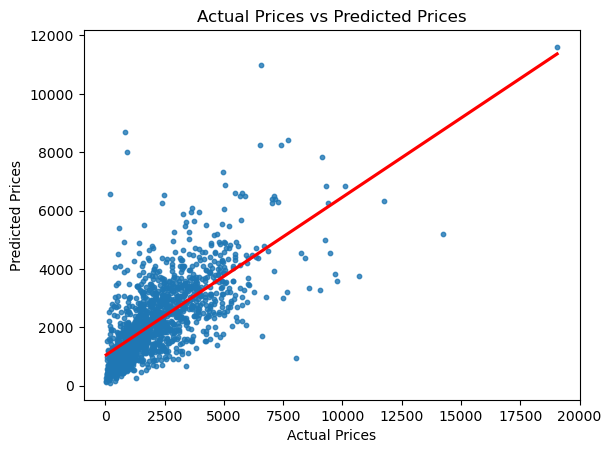

In [367]:
sns.regplot(x=ytest, y=y_pred, ci=None, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [365]:
ytest

6236     2714.197038
9869     4420.912000
385       197.076800
14061    1644.526000
872      1462.795288
            ...     
4015      664.266603
7090     2001.394800
12704    5211.240150
9342     1518.653304
12019     245.014400
Name: Item_Outlet_Sales, Length: 1421, dtype: float64

In [366]:
y_pred

array([2756.34396401, 3377.82125453,  464.67328855, ..., 5464.7914418 ,
       2178.10709637,  453.2821183 ])